Our project aims to analyze the socio-economic and demographic determinants of child stunting in India using the National Family Health Survey (NFHS-5) dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap


In [15]:
# Correct the file path to point to the actual location of the file

data = pd.read_excel('NFHS_5_Factsheets_Data.xls')  # Ensure the file is in the same directory as the notebook
data.head()

,States/UTs,Area,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Women (age 15-49 years) having a bank or savings account that they themselves use (%),Women (age 15-49 years) having a mobile phone that they themselves use (%),Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%),Ever-married women age 18-49 years who have ever experienced spousal violence27 (%),Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%),Young women age 18-29 years who experienced sexual violence by age 18 (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,India,Urban,160138,179535,26420,82.51,23.14,985.28,924.35,93.3,...,80.93,69.36,89.37,24.19,2.51,1.1,5.44,28.82,0.58,16.53
1,India,Rural,476561,544580,75419,66.77,28.10,1037.29,930.94,87.53,...,77.43,46.61,72.32,31.63,3.41,1.64,10.49,42.69,1.61,19.92
2,India,Total,636699,724115,101839,71.76,26.52,1020.45,929.16,89.08,...,78.56,53.95,77.33,29.31,3.13,1.48,8.85,37.99,1.28,18.77
3,Andaman & Nicobar Islands,Urban,527,557,85,86.46,22.67,1022.74,941.04,96.86,...,88.48,80.79,98.47,23.19,-0.01,1.37,14.95,44.71,0.69,33.83
4,Andaman & Nicobar Islands,Rural,2097,1840,282,81.75,19.69,929.23,891.11,97.84,...,89.75,80.86,99.12,13.22,0.5,2.16,41.06,66.39,7.60,41.94


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Columns: 136 entries, States/UTs to Men age 15 years and above who consume alcohol (%)
dtypes: float64(25), int64(3), object(108)
memory usage: 118.1+ KB


In [17]:
for col in data.columns:
        print(f"'{col}'")


'States/UTs'
'Area'
'Number of Households surveyed'
'Number of Women age 15-49 years interviewed'
'Number of Men age 15-54 years interviewed'
'Female population age 6 years and above who ever attended school (%)'
'Population below age 15 years (%)'
' Sex ratio of the total population (females per 1,000 males)'
'Sex ratio at birth for children born in the last five years (females per 1,000 males)'
'Children under age 5 years whose birth was registered with the civil authority (%)'
'Deaths in the last 3 years registered with the civil authority (%)'
'Population living in households with electricity (%)'
'Population living in households with an improved drinking-water source1 (%)'
'Population living in households that use an improved sanitation facility2 (%)'
'Households using clean fuel for cooking3 (%)'
'Households using iodized salt (%)'
'Households with any usual member covered under a health insurance/financing scheme (%)'
'Children age 5 years who attended pre-primary school during 

In [18]:
columns_to_use = [
    # Target variables
    'Children under 5 years who are stunted (height-for-age)18 (%)',
    'Children under 5 years who are wasted (weight-for-height)18 (%)',
    'Children under 5 years who are underweight (weight-for-age)18 (%)',
    
    # Child-specific features
    'Children under age 6 months exclusively breastfed16 (%)',
    'Children under age 3 years breastfed within one hour of birth15 (%)',
    'Total children age 6-23 months receiving an adequate diet16, 17  (%)',
    'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%) ',
    'Children with fever or symptoms of ARI in the 2 weeks preceding the survey taken to a health facility or health provider (Children under age 5 years) (%)  ',
    
    # Maternal/Parental features
    'Women (age 15-49) who are literate4 (%)',
    'Women (age 15-49)  with 10 or more years of schooling (%)',
    'Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)',
    'Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)',
    'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)',
    'Women age 20-24 years married before age 18 years (%)',
    'Women (age 15-49)  who have ever used the internet (%)',
    
    # Household & socio-economic
    'Population living in households with electricity (%)',
    'Population living in households with an improved drinking-water source1 (%)',
    'Population living in households that use an improved sanitation facility2 (%)',
    'Households using clean fuel for cooking3 (%)',
    'Households using iodized salt (%)',
    'Households with any usual member covered under a health insurance/financing scheme (%)',
    
    # Health & fertility
    'Total Fertility Rate (number of children per woman)',
    'Neonatal mortality rate (per 1000 live births)',
    'Infant mortality rate (per 1000 live births)',
    'Under-five mortality rate (per 1000 live births)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any method6 (%)'
]
data = data[columns_to_use] 
data.head()

,Children under 5 years who are stunted (height-for-age)18 (%),Children under 5 years who are wasted (weight-for-height)18 (%),Children under 5 years who are underweight (weight-for-age)18 (%),Children under age 6 months exclusively breastfed16 (%),Children under age 3 years breastfed within one hour of birth15 (%),"Total children age 6-23 months receiving an adequate diet16, 17 (%)",Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%),Children with fever or symptoms of ARI in the 2 weeks preceding the survey taken to a health facility or health provider (Children under age 5 years) (%),Women (age 15-49) who are literate4 (%),Women (age 15-49) with 10 or more years of schooling (%),...,Population living in households with an improved drinking-water source1 (%),Population living in households that use an improved sanitation facility2 (%),Households using clean fuel for cooking3 (%),Households using iodized salt (%),Households with any usual member covered under a health insurance/financing scheme (%),Total Fertility Rate (number of children per woman),Neonatal mortality rate (per 1000 live births),Infant mortality rate (per 1000 live births),Under-five mortality rate (per 1000 live births),Current Use of Family Planning Methods (Currently Married Women Age 15-49 years) - Any method6 (%)
0,30.12,18.54,27.34,59.63,44.67,12.25,6.16,72.7,83.01,56.28,...,98.67,81.47,89.65,96.92,38.08,1.63,17.96,26.56,31.45,69.26
1,37.34,19.51,33.78,65.06,40.68,10.96,7.71,67.82,65.90,33.70,...,94.57,64.90,43.21,92.97,42.44,2.14,27.45,38.36,45.69,65.55
2,35.47,19.26,32.11,63.72,41.75,11.3,7.3,69.01,71.46,41.04,...,95.87,70.17,58.62,94.28,40.99,1.99,24.91,35.2,41.86,66.71
3,18.15,12.83,15.07,*,45.76,-27.74,6.23,-80.97,86.55,59.71,...,98.03,87.95,95.63,99.65,1.44,1.44,*,*,*,54.43
4,26.42,18.95,31.14,*,47.78,10.59,5.13,64.64,85.58,47.57,...,95.31,87.98,71.01,99.74,1.61,1.17,-2.82,-8.39,-9.46,73.38


In [19]:
# Check basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 26 columns):
 #   Column                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                       --------------  -----  
 0   Children under 5 years who are stunted (height-for-age)18 (%)                                                                                                111 non-null    object 
 1   Children under 5 years who are wasted (weight-for-height)18 (%)                                                                                              111 non-null    object 
 2   Children under 5 years who are underweight (weight-for-age)18 (%)                                                                                 

In [21]:
# Replace '*' with NaN
data = data.replace('*', np.nan)
data[data < 0] = np.nan

In [22]:
# Check missing values
missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Percent': missing_percent})
missing_df.sort_values(by='Missing Percent', ascending=False)


,Missing Count,Missing Percent
Children under age 6 months exclusively breastfed16 (%),23,20.720721
Neonatal mortality rate (per 1000 live births),22,19.819820
Infant mortality rate (per 1000 live births),22,19.819820
Under-five mortality rate (per 1000 live births),21,18.918919
Children with fever or symptoms of ARI in the 2 weeks preceding the survey taken to a health facility or health provider (Children under age 5 years) (%),17,15.315315
"Total children age 6-23 months receiving an adequate diet16, 17 (%)",11,9.909910
Women (age 15-49) who have ever used the internet (%),3,2.702703
Children under age 3 years breastfed within one hour of birth15 (%),3,2.702703
Women age 20-24 years married before age 18 years (%),2,1.801802
Children under 5 years who are wasted (weight-for-height)18 (%),1,0.900901


In [23]:
data = data.apply(pd.to_numeric)

#  Replace numeric NaN values with column mean
for col in data.select_dtypes(include=np.number).columns:
    mean_value = data[col].mean()
    data[col] = data[col].fillna(mean_value)

In [24]:
# Check missing values
data = data.replace('*', np.nan)
missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Percent': missing_percent})
missing_df.sort_values(by='Missing Percent', ascending=False)

,Missing Count,Missing Percent
Children under 5 years who are stunted (height-for-age)18 (%),0,0.0
Children under 5 years who are wasted (weight-for-height)18 (%),0,0.0
Children under 5 years who are underweight (weight-for-age)18 (%),0,0.0
Children under age 6 months exclusively breastfed16 (%),0,0.0
Children under age 3 years breastfed within one hour of birth15 (%),0,0.0
"Total children age 6-23 months receiving an adequate diet16, 17 (%)",0,0.0
Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%),0,0.0
Children with fever or symptoms of ARI in the 2 weeks preceding the survey taken to a health facility or health provider (Children under age 5 years) (%),0,0.0
Women (age 15-49) who are literate4 (%),0,0.0
Women (age 15-49) with 10 or more years of schooling (%),0,0.0


In [25]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Children under 5 years who are stunted (height-for-age)18 (%),111.0,30.577545,6.383896,15.05,26.210,30.577545,34.805,48.21
Children under 5 years who are wasted (weight-for-height)18 (%),111.0,16.875182,4.393657,7.55,13.175,17.550000,19.515,27.33
Children under 5 years who are underweight (weight-for-age)18 (%),111.0,25.515727,8.057675,9.04,20.065,25.600000,31.965,43.52
Children under age 6 months exclusively breastfed16 (%),111.0,62.941250,9.209587,28.25,59.795,62.941250,68.970,81.52
Children under age 3 years breastfed within one hour of birth15 (%),111.0,48.645278,13.292837,19.43,39.340,49.170000,58.225,79.93
"Total children age 6-23 months receiving an adequate diet16, 17 (%)",111.0,14.670400,6.212815,5.50,9.945,13.600000,18.975,39.48
Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%),111.0,6.016727,2.652090,0.96,4.265,5.580000,7.165,13.86
Children with fever or symptoms of ARI in the 2 weeks preceding the survey taken to a health facility or health provider (Children under age 5 years) (%),111.0,65.829362,10.863187,24.39,62.360,65.829362,71.350,90.65
Women (age 15-49) who are literate4 (%),111.0,81.213545,10.051858,54.54,75.160,82.960000,87.680,99.14
Women (age 15-49) with 10 or more years of schooling (%),111.0,48.343000,14.463395,17.89,35.970,49.060000,59.820,79.78


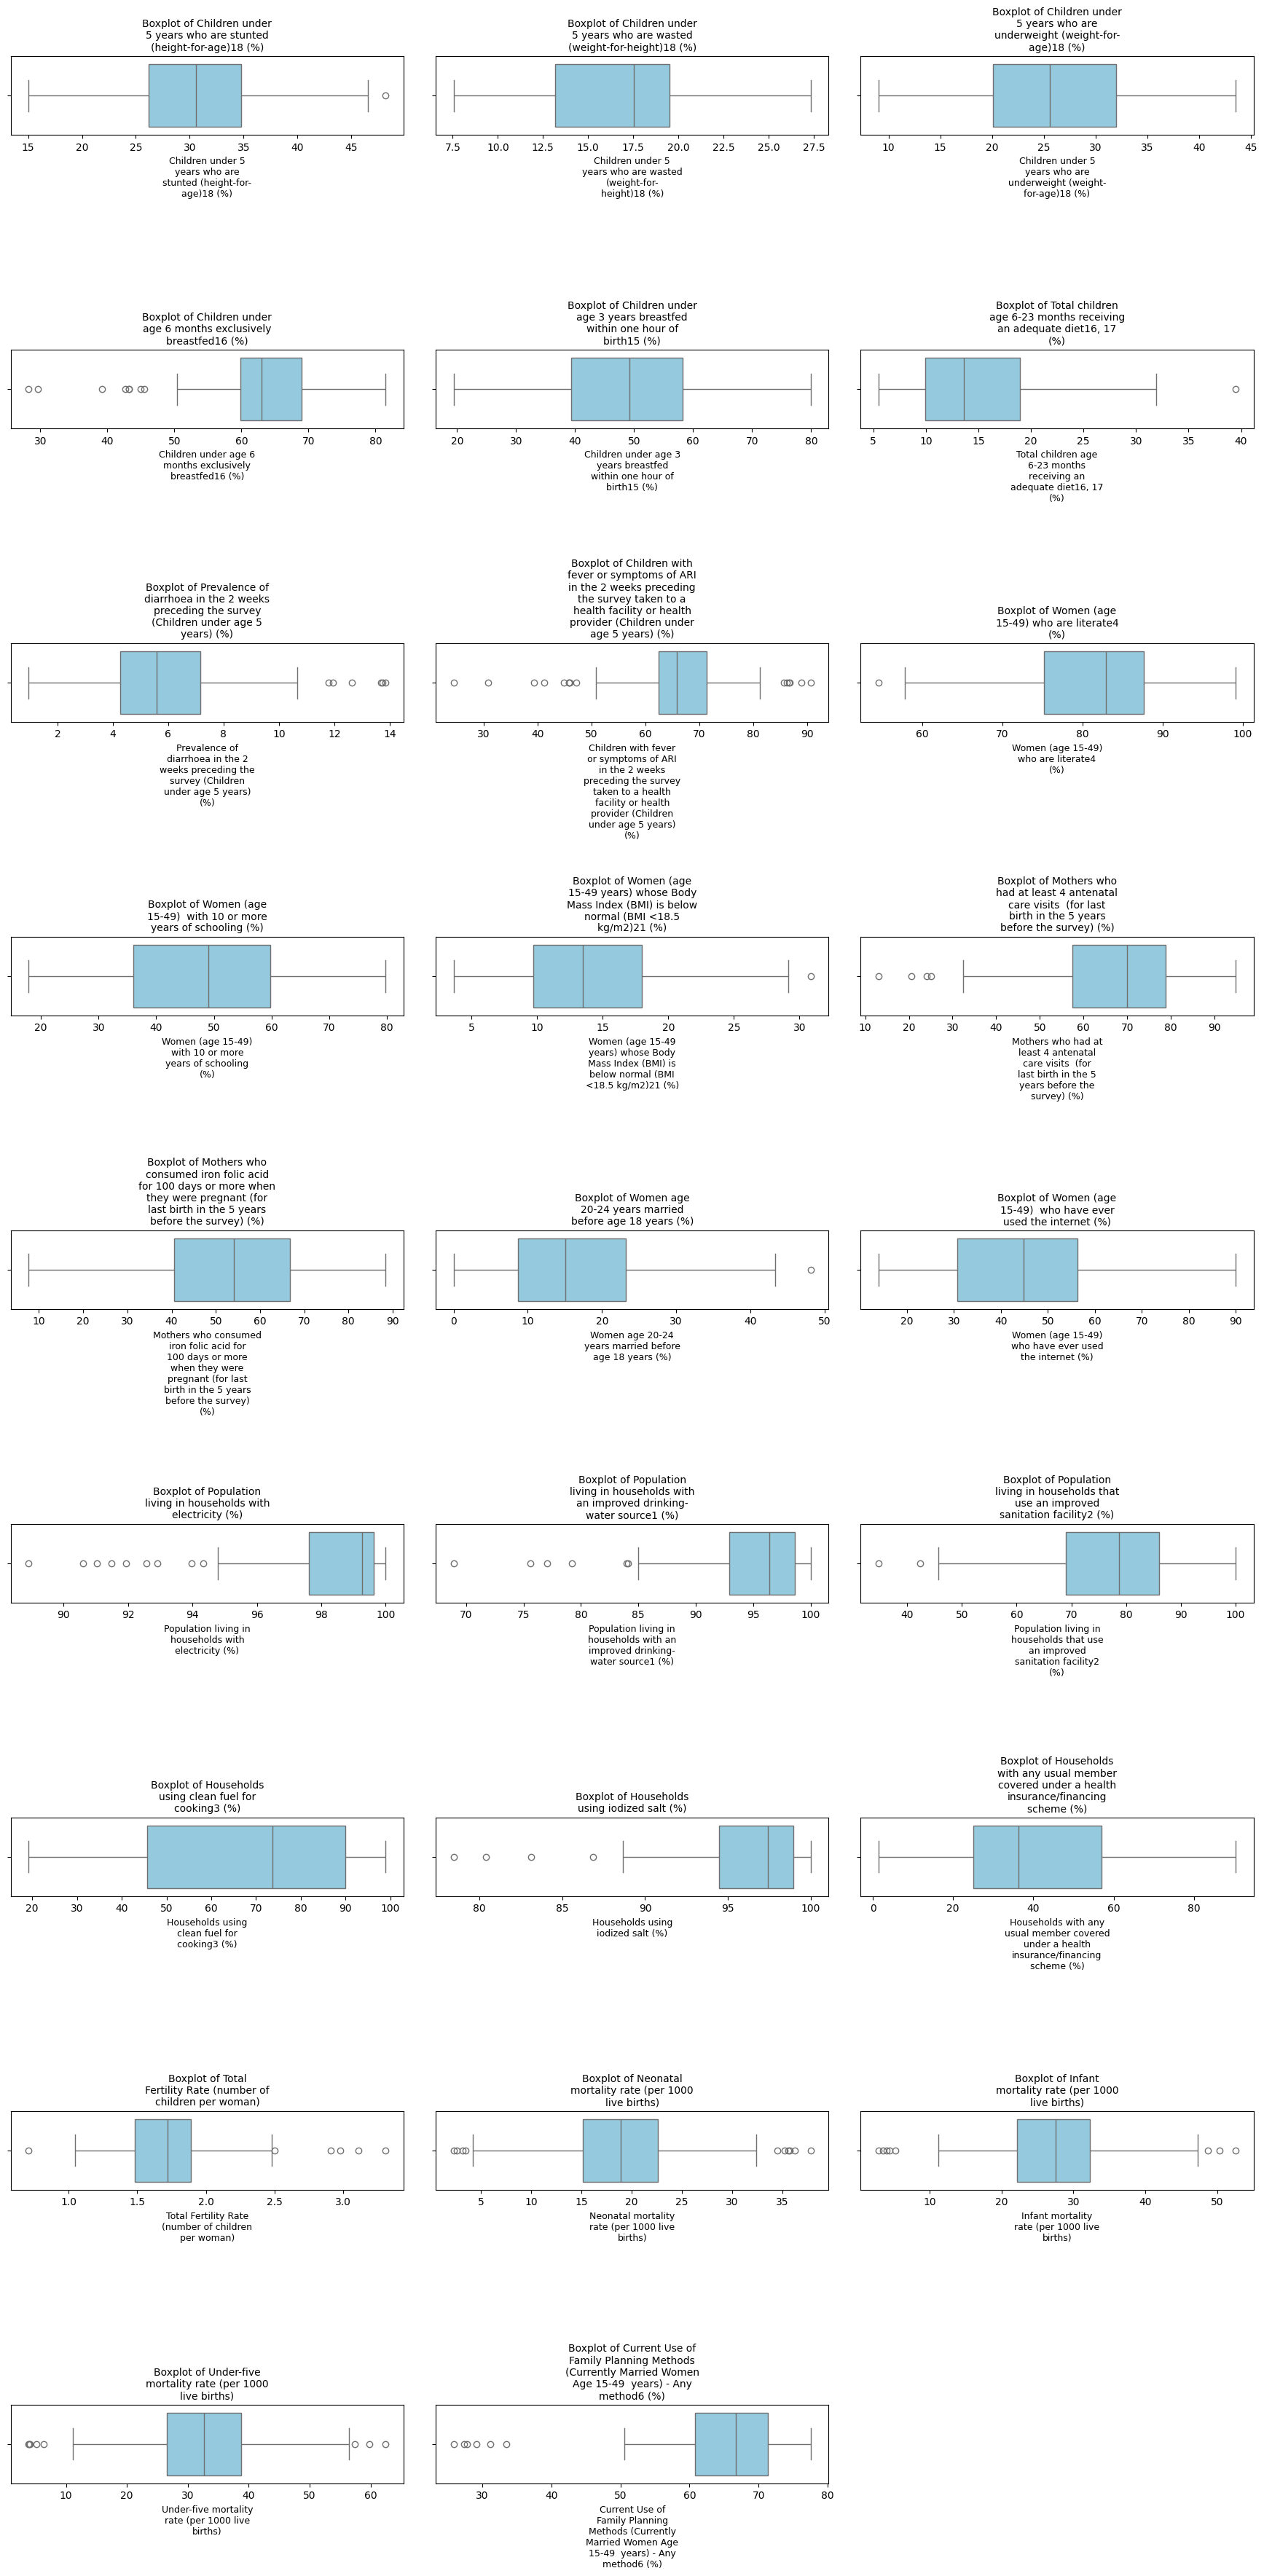

In [26]:
# Number of columns per row
numeric_cols = data.select_dtypes(include=np.number).columns
n_cols = 3
n_plots = len(numeric_cols)
n_rows = (n_plots + n_cols - 1) // n_cols  # round up number of rows
plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[col], color="skyblue")

    # Wrap long text for title and labels
    title = textwrap.fill(f"Boxplot of {col}", width=25)
    xlabel = textwrap.fill(col, width=20)

    plt.title(title, fontsize=10)
    plt.xlabel(xlabel, fontsize=9)

# Add spacing between plots
plt.tight_layout(pad=3.0, w_pad=2.5, h_pad=3.5)

plt.show()

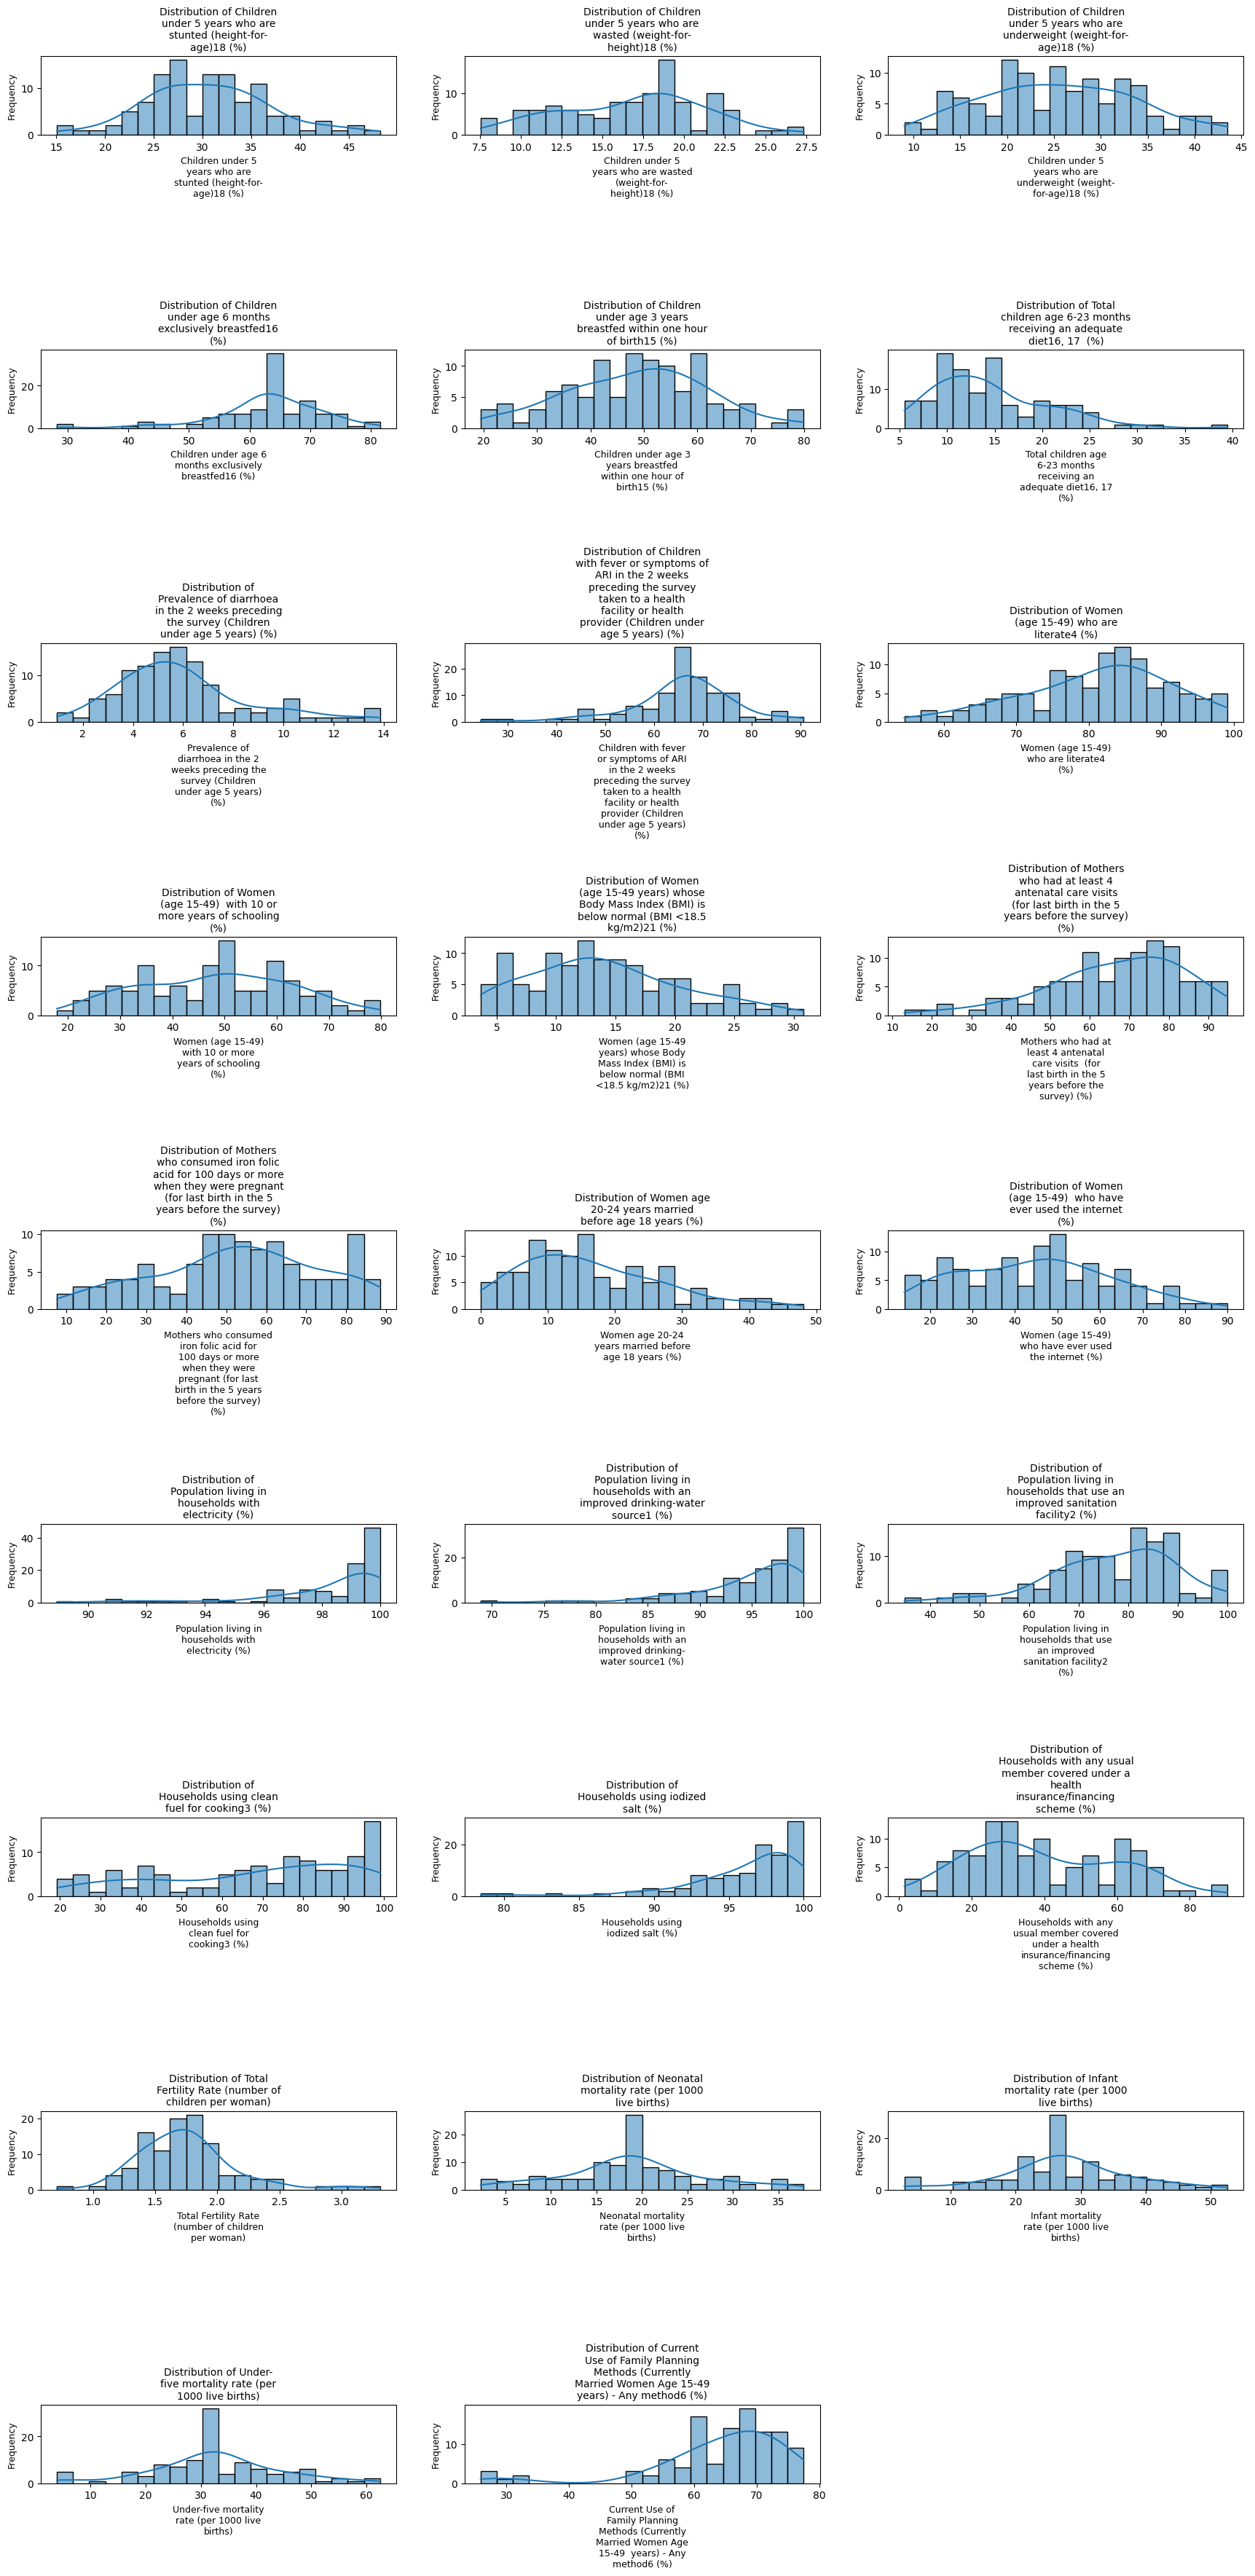

In [27]:
# Number of columns per row
numeric_cols = data.select_dtypes(include=np.number).columns
n_cols = 3
n_plots = len(numeric_cols)
n_rows = (n_plots + n_cols - 1) // n_cols  # round up number of rows

plt.figure(figsize=(n_cols * 6, n_rows * 4))  # overall figure size

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col].dropna(), kde=True, bins=20)

    # Wrap title and axis labels to avoid overlap
    title = textwrap.fill(f"Distribution of {col}", width=25)
    xlabel = textwrap.fill(col, width=20)
    ylabel = textwrap.fill("Frequency", width=15)

    plt.title(title, fontsize=10)
    plt.xlabel(xlabel, fontsize=9)
    plt.ylabel(ylabel, fontsize=9)

# Add space between subplots
plt.tight_layout(pad=3.0, w_pad=2.5, h_pad=3.5)

plt.show()